#Assignment 1
#Z1857655
# Akram Shaik

In [31]:
# importing pandas library to convert lists into dataframe
import pandas as pd
# importing numpy to perform mathematical operations on data
import numpy as np
# importing request library to load data from github
import requests

In [32]:
# function to create a matrix consisting of 0's and 1's in each row
# length of matrix created will be equal to total number of images in the dataset
# each image of 28 x 28 block in dataset is converted into a single row 

def create_matrix(target_url):
  # using request library we load dataset in data
  data = requests.get(target_url)
  # here we decode the data collected in utf-8 format and split the lines to create list of all data
  data=data.content.decode('utf-8').splitlines()
  # creating multiple chunks from the whole data, 28 rows form 1 chunk  
  chunks = [ data[i:i + 28] for i in range(0, len(data), 28) ]
  # creating empty matrix list to load each image as row by looping through chunks
  matrix=[]
  for chunk in chunks:
    # creating empty list to to form as a single row of 784 values
    L=[]
    # looping through 28 x 28 image
    for line in chunk:
      for ch in line:
        # comparing if read character is space and replace it with 0 and if + or # replace with 1 in L
        if ch==' ':
          #print('space')
          L.append(0)
        elif ch=='+' or ch=='#':
          L.append(1)
    # appending complete 1 image converted as 1 row in matrix
    matrix.append(L)
  #returning whole matrix
  return matrix

In [33]:
# creating train and test path variable
train_path = 'https://raw.githubusercontent.com/akramshaik2326/NN_CV/master/Datasets/trainingimages.txt'
test_path = 'https://raw.githubusercontent.com/akramshaik2326/NN_CV/master/Datasets/testimages.txt'

# calling function to create matrix of train and test dataset
train_matrix = create_matrix(train_path)
test_matrix = create_matrix(test_path)

In [34]:
# printing shapes of data extracted
print(len(train_matrix))
print(len(train_matrix[0]))
print(len(test_matrix))
print(len(test_matrix[0]))

5000
784
1000
784


In [35]:
# function to create list of labels by reading data from github
def create_label(target_url):
  # loading data in similar way as training data was loaded
  data = requests.get(target_url)
  data=data.content.decode('utf-8').splitlines()
  label = [ int(i) for i in data ]
  return label

In [36]:
# creating train and test path variable
train_label_path=r"https://raw.githubusercontent.com/akramshaik2326/NN_CV/master/Datasets/traininglabels.txt"
test_label_path=r"https://raw.githubusercontent.com/akramshaik2326/NN_CV/master/Datasets/testlabels.txt"

# calling function to create list of train and test label dataset
train_label=create_label(train_label_path)
test_label=create_label(test_label_path)

In [37]:
# printing shapes of data extracted
print(len(train_label))
print(len(test_label))

5000
1000


In [38]:
#train_array=np.array(train_matrix)
#test_array=np.array(test_matrix)
#train_labelarray=np.array(train_label)
#test_labelarray=np.array(test_label)

In [39]:
# creating set of train and test data by appending label of each image as column
train_set=np.column_stack(( np.array(train_matrix), np.array(train_label) ))
test_set=np.column_stack(( np.array(test_matrix), np.array(test_label) ))

In [40]:
# printing shapes of data created
print('Train set shape: ', train_set.shape)
print('Test set shape: ', test_set.shape)

Train set shape:  (5000, 785)
Test set shape:  (1000, 785)


In [41]:
# grouping the data by label values
def group_labels(dataset):
  grouped = dict()
  # looping through len of dataset
  for i in range(len(dataset)):
    # taking single row from matrix
    row = dataset[i]
    # storing label or class of the same row
    label = row[-1]
    # if label vaue is new then create nested list of that label
    if (label not in grouped):
      grouped[label] = list()
    grouped[label].append(row[:-1])
  return grouped
grouped_data = group_labels(train_set)

In [42]:
# printing shapes of grouped data 
print(len(grouped_data))
print(len(grouped_data[0]))
print(len(grouped_data[0][0]))

10
479
784


In [43]:
# function to calculate likelihood for all rows of each label
def calculate_likelihood(label_data):
  p_xy = []
  # looping to calculate likelihood of having '0' or '1' on each 784 values of all rows
  for i in range(784):
    # initializing counter to count all 0's and 1's on i'th position of all rows
    count0 = 0
    count1 = 0
    # looping through all rows and incrementing counter
    for row in label_data:
      if row[i] == 0:
        count0 += 1
      else:
        count1 += 1
      # storing likelihood of 0's and 1's for each i'th position with k value as 0.1 
      likelihood = [(count0 + 0.1)/(len(label_data) + 0.2), (count1 + 0.1)/(len(label_data) + 0.2)]
    p_xy.append(likelihood)
  return p_xy

In [44]:
# function to call likelihood for each group and its prior from the grouped data
def summarize_by_class(grouped_data):
  # create dictionary to store likelihood and prior of each label
  Naivebayes_model = dict()
  for label, label_rows in grouped_data.items():
    # calculate prior : probablity of single label grouped rows
    p_y = len(label_rows)/5000
    # calling likelihood function with all rows of single label as argument
    p_xy = calculate_likelihood(label_rows)
    # storing values obtaied for each label
    Naivebayes_model[label] = [p_xy, p_y]
  return Naivebayes_model

#calling function to summarize the likelihood and prior of all rows for every label from grouped data
Naivebayes_model = summarize_by_class(grouped_data)

In [45]:
#print(len(Naivebayes_model[5][0]))
#for key, value in Naivebayes_model.items():
#    print(key)
#    if key==5:
#      print('len ',len(Naivebayes_model[5][0]))
#      print('len ',len(value) )
#      print(value)

In [46]:
# function to calculate postirior with model and single row of test data as argument
def calculate_postirior(Naivebayes_model, sample_row):
  # creating dictionary of probablities
  probabilities = dict()
  # looping through all labels of model
  for label, label_values in Naivebayes_model.items():
    # storing label as key and assigning it label's prior log value
    probabilities[label] = np.log(label_values[1])
    # loop through all 784 positions
    for i in range(784):
      # adding log value of i'th value from sample row as position to label_values
      probabilities[label] += np.log(label_values[0][i][int(sample_row[i])])
  return probabilities

In [47]:
#print(test_set[0])
#model[0][70][70]

In [48]:
#test_set[0][:]

In [49]:
# function to classify label of test data through the model created
def classify(Naivebayes_model, row):
  # calling function to calculate postirior
  probabilities = calculate_postirior(Naivebayes_model, row)
  #print(probabilities)
  best_probab = 0
  best_label = None
  # looping through values of probablities and taking label having max probability
  for class_value, probability in probabilities.items():
    if (best_label == None) or (probability > best_probab):
      best_probab = probability
      best_label = class_value
  return best_label

In [50]:
# creating empty list of actual and prediction values
predictions=[]
actual=[]
# looping through all labels of test data
for row in test_set:
  # appending actual label to list
  actual.append(row[-1])
  # appending predicted values by calling classify function with model and single row of test data as argument
  predictions.append(classify(Naivebayes_model, row[:-1]))

In [51]:
# counting total  number of correct predicted values
count= sum(1 for i in range(len(actual)) if actual[i]==predictions[i])
# calculating accuracy 
accuracy = count / float(len(actual)) * 100.0
print("Test Accuracy is: %.2f percent!" %accuracy )

Test Accuracy is: 77.30 percent!


In [52]:
# using dataframe to store actual and predicted values
# this helps to visually comapre all actual and predicted value of each image
df=pd.DataFrame()
df['Actual']=actual
df['Predicted']=predictions

#print first 30 predictions as there are 1000 images in test data.
df.head(30)

,Actual,Predicted
0,9,7
1,0,0
2,2,2
3,5,3
4,1,1
5,9,9
6,7,7
7,8,8
8,1,1
9,0,0


In [53]:
# importing seaborn and matplotlib to plot confusion matrix
import seaborn as sn
import matplotlib.pyplot as plt
# importing confusion matrix from sklearn learn to understand the performance of the classification
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(actual,predictions)
#cm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


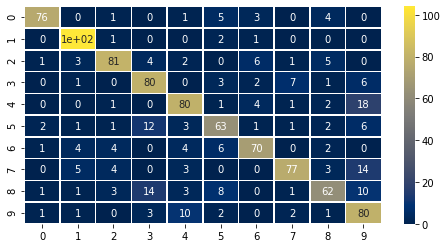

In [54]:
# plotting heat mam of confusion matrix
plt.figure(figsize = (8,4))
sn.heatmap(cm, annot=True, linewidths=.5, cmap="cividis")

In [55]:
#pip install pyplot

In [56]:
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
#fig = make_subplots()
#fig.add_trace( go.Table( header=dict(values=["S.No", "Actual", "Predicted"],font=dict(size=10)),cells=dict(values=[df[k].tolist() for k in df.columns[:]])))
#fig.update_layout(height=500)